<a href="https://colab.research.google.com/github/tsancode/Population5/blob/miftarj-patch-1/code/Preliminary_data_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import requests
from io import StringIO
import matplotlib.pyplot as plt


In [ ]:
orig_url='https://drive.google.com/file/d/1QdEZdgXWwctSGsx0awJGX7xWqQm08dR1/view?usp=sharing'

file_id = orig_url.split('/')[-2]
dwn_url='https://drive.google.com/uc?export=download&id=' + file_id
url = requests.get(dwn_url).text
csv_raw = StringIO(url)
df = pd.read_csv(csv_raw)

Exploratory

In [ ]:
df.head()

,TAHUN,NAMA PROVINSI,NAMA KABUPATEN/KOTA,NAMA KECAMATAN,NAMA KELURAHAN,LUAS WILAYAH (KM2),KEPADATAN (JIWA/KM2),Unnamed: 7,Unnamed: 8,Unnamed: 9,...,55-59 Laki-Laki,55-59 Perempuan,60-64 Laki-Laki,60-64 Perempuan,65-69 Laki-Laki,65-69 Perempuan,70-74 Laki-Laki,70-74 Perempuan,>75 Laki-Laki,>75 Perempuan
0,2013,PROVINSI DKI JAKARTA,KAB.ADM.KEP.SERIBU,KEP. SERIBU UTR,P. PANGGANG,0.91,6779,NaN,NaN,NaN,...,98,106,72,65,36,33,33,20,13,27
1,2013,PROVINSI DKI JAKARTA,KAB.ADM.KEP.SERIBU,KEP. SERIBU UTR,P. KELAPA,3.76,1705,NaN,NaN,NaN,...,30,39,29,24,12,21,13,5,5,8
2,2013,PROVINSI DKI JAKARTA,KAB.ADM.KEP.SERIBU,KEP. SERIBU UTR,P. HARAPAN,3.59,628,NaN,NaN,NaN,...,139,101,73,56,18,35,24,25,18,26
3,2013,PROVINSI DKI JAKARTA,KAB.ADM.KEP.SERIBU,KEP. SERIBU SLT,P. UNTUNG JAWA,0.59,3625,NaN,NaN,NaN,...,97,83,58,56,40,54,26,27,16,13
4,2013,PROVINSI DKI JAKARTA,KAB.ADM.KEP.SERIBU,KEP. SERIBU SLT,P. TIDUNG,1.57,3084,NaN,NaN,NaN,...,37,32,22,13,18,15,10,18,11,17


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 37 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TAHUN                 267 non-null    int64  
 1   NAMA PROVINSI         267 non-null    object 
 2   NAMA KABUPATEN/KOTA   267 non-null    object 
 3   NAMA KECAMATAN        267 non-null    object 
 4   NAMA KELURAHAN        267 non-null    object 
 5   LUAS WILAYAH (KM2)    267 non-null    float64
 6   KEPADATAN (JIWA/KM2)  267 non-null    int64  
 7   Unnamed: 7            0 non-null      float64
 8   Unnamed: 8            0 non-null      float64
 9   Unnamed: 9            0 non-null      float64
 10  Unnamed: 10           0 non-null      float64
 11  Unnamed: 11           0 non-null      float64
 12  Unnamed: 12           0 non-null      float64
 13  Unnamed: 13           0 non-null      float64
 14  Unnamed: 14           0 non-null      float64
 15  Unnamed: 15           0

K-Means clustering.
Source: https://www.kaggle.com/code/sunixliu/mall-customer-data-analysis-and-segmentation

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
df[df.columns[4]] = df[df.columns[2]] + df[df.columns[3]] + df[df.columns[4]]

In [ ]:
ds = df.drop(df.columns[[0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]], axis=1)

In [ ]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   NAMA KELURAHAN   267 non-null    object
 1   35-39 Laki-Laki  267 non-null    int64 
 2   35-39 Perempuan  267 non-null    int64 
 3   40-44 Laki-Laki  267 non-null    int64 
 4   40-44 Perempuan  267 non-null    int64 
 5   45-49 Laki-Laki  267 non-null    int64 
 6   45-49 Perempuan  267 non-null    int64 
 7   50-54 Laki-Laki  267 non-null    int64 
 8   50-54 Perempuan  267 non-null    int64 
 9   55-59 Laki-Laki  267 non-null    int64 
 10  55-59 Perempuan  267 non-null    int64 
 11  60-64 Laki-Laki  267 non-null    int64 
 12  60-64 Perempuan  267 non-null    int64 
 13  65-69 Laki-Laki  267 non-null    int64 
 14  65-69 Perempuan  267 non-null    int64 
 15  70-74 Laki-Laki  267 non-null    int64 
 16  70-74 Perempuan  267 non-null    int64 
 17  >75 Laki-Laki    267 non-null    in

In [ ]:
ds.set_index("NAMA KELURAHAN",inplace=True)

In [ ]:
#Percobaan 4 klaster 
kmeans4 = KMeans(n_clusters=4)
kmeans4.fit(ds)

KMeans(n_clusters=4)

In [ ]:
pred4 = kmeans4.fit_predict(ds)

In [ ]:
ds_pred4 = ds.copy()
ds_pred4['Class']=pred4

In [ ]:
ds_pred4

,35-39 Laki-Laki,35-39 Perempuan,40-44 Laki-Laki,40-44 Perempuan,45-49 Laki-Laki,45-49 Perempuan,50-54 Laki-Laki,50-54 Perempuan,55-59 Laki-Laki,55-59 Perempuan,60-64 Laki-Laki,60-64 Perempuan,65-69 Laki-Laki,65-69 Perempuan,70-74 Laki-Laki,70-74 Perempuan,>75 Laki-Laki,>75 Perempuan,Class
NAMA KELURAHAN,,,,,,,,,,,,,,,,,,,
KAB.ADM.KEP.SERIBUKEP. SERIBU UTRP. PANGGANG,231,235,233,210,171,158,137,126,98,106,72,65,36,33,33,20,13,27,3
KAB.ADM.KEP.SERIBUKEP. SERIBU UTRP. KELAPA,84,88,99,88,72,63,34,29,30,39,29,24,12,21,13,5,5,8,3
KAB.ADM.KEP.SERIBUKEP. SERIBU UTRP. HARAPAN,255,238,232,234,212,193,150,161,139,101,73,56,18,35,24,25,18,26,3
KAB.ADM.KEP.SERIBUKEP. SERIBU SLTP. UNTUNG JAWA,199,185,178,176,162,139,100,119,97,83,58,56,40,54,26,27,16,13,3
KAB.ADM.KEP.SERIBUKEP. SERIBU SLTP. TIDUNG,98,75,73,94,67,69,60,40,37,32,22,13,18,15,10,18,11,17,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
JAKARTA TIMURCIPAYUNGMUNJUL,1167,1112,1026,977,839,800,668,622,482,482,302,291,173,137,118,94,52,51,3
JAKARTA TIMURCIPAYUNGSETU,937,928,857,824,705,640,512,471,392,354,254,211,124,115,64,83,59,64,3
JAKARTA TIMURCIPAYUNGBAMBU APUS,1242,1187,1062,1063,984,917,731,841,596,476,377,250,169,179,108,96,70,84,3


Comparing performance for diff clusters
Let's use Silhouette Coefficient to evaluate the model

In [ ]:
from yellowbrick.cluster import silhouette_visualizer 

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"


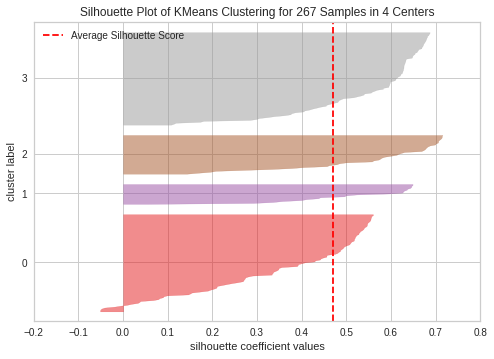

SilhouetteVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fbc2f68ee50>,
                     estimator=KMeans(n_clusters=4))

In [ ]:
silhouette_visualizer(kmeans4, ds, k=(2,10)) 

Elbow chart

In [ ]:
from yellowbrick.cluster.elbow import kelbow_visualizer

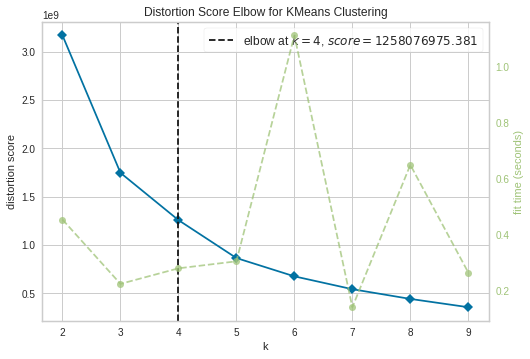

In [ ]:
kv = kelbow_visualizer(kmeans4, ds, k=(2,10))  

Berdasarkan Elbow chart, n_cluster=4 adalah yg terbaik

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
silhouette_avg4 = silhouette_score(ds, pred4)

In [ ]:
print(silhouette_avg4)

0.46985850416191294


In [ ]:
ds_pred4.groupby("Class").agg([np.median,np.mean])

35-39 Laki-Laki              35-39 Perempuan               \
               median         mean          median         mean   
Class                                                             
0              2055.0  2244.086538          1932.0  2071.865385   
1              6463.5  6690.272727          3673.0  3912.727273   
2              3181.0  3215.000000          1905.5  1932.809524   
3              1026.0   898.272727           928.0   828.171717   

      40-44 Laki-Laki              40-44 Perempuan               \
               median         mean          median         mean   
Class                                                             
0              1846.0  1962.625000          1863.5  2009.201923   
1              3699.5  3848.227273          7278.0  7760.954545   
2              1875.5  1881.642857          3846.5  3814.452381   
3               914.0   803.979798           977.0   834.656566   

      45-49 Laki-Laki               ... 65-69 Perempuan               \
               median         mean  ...          median         mean   
Class                               ...                                
0              1571.0  1657.500000  ...           393.5   447.932692   
1              4258.5  4585.681818  ...          2542.0  2661.863636   
2              2230.5  2223.523810  ...          1381.5  1386.404762   
3               820.0   729.474747  ...           177.0   193.393939   

      70-74 Laki-Laki              70-74 Perempuan              >75 Laki-Laki  \
               median         mean          median         mean        median   
Class                                                                           
0               292.0   353.817308           269.5   437.615385         196.5   
1              2317.5  2461.863636          4835.0  5123.727273        1886.5   
2              1294.0  1293.761905          2673.0  2680.166667        1022.5   
3               143.0   169.454545           116.0   186.161616         105.0   

                   >75  Perempuan               
              mean         median         mean  
Class                                           
0       255.375000          211.0   265.307692  
1      2036.590909         1892.5  1960.454545  
2      1067.119048         1011.0  1061.833333  
3       133.383838          110.0   130.434343  

[4 rows x 36 columns]

In [ ]:
ds_pred4['wilayah']=ds_pred4.index

In [ ]:
hasil = ds_pred4.groupby("Class")['wilayah'].count().reset_index()
print(hasil)

   Class  wilayah
0      0      104
1      1       22
2      2       42
3      3       99


In [ ]:
hasil['persentase'] = 100 * hasil['wilayah']  / hasil['wilayah'].sum()
print(hasil)

   Class  wilayah  persentase
0      0      104   38.951311
1      1       22    8.239700
2      2       42   15.730337
3      3       99   37.078652


In [ ]:
"""
daftar = ds_pred4.groupby("Class")['wilayah'].apply(list)
print(daftar[0])
print(daftar[1])
print(daftar[2])
print(daftar[3])"""

['JAKARTA PUSATSAWAH BESARKARANG ANYAR', 'JAKARTA PUSATSAWAH BESARMANGGA DUA SELATAN', 'JAKARTA PUSATKEMAYORANKEBON KOSONG', 'JAKARTA PUSATKEMAYORANSERDANG', 'JAKARTA PUSATKEMAYORANCEMPAKA BARU', 'JAKARTA PUSATKEMAYORANUTAN PANJANG', 'JAKARTA PUSATSENENKRAMAT', 'JAKARTA PUSATCEMPAKA PUTIHCEMPAKA PUTIH BARAT', 'JAKARTA PUSATTANAH ABANGPETAMBURAN', 'JAKARTA PUSATTANAH ABANGKEBON MELATI', 'JAKARTA PUSATJOHAR BARUJOHAR BARU', 'JAKARTA PUSATJOHAR BARUTANAH TINGGI', 'JAKARTA UTARACILINCINGMARUNDA', 'JAKARTA BARATGROGOL PETAMBURANGROGOL', 'JAKARTA BARATGROGOL PETAMBURANTANJUNG DUREN UTARA', 'JAKARTA BARATTAMAN SARIKRUKUT', 'JAKARTA BARATTAMAN SARIMAPHAR', 'JAKARTA BARATTAMAN SARIKEAGUNGAN', 'JAKARTA BARATTAMBORADURI UTARA', 'JAKARTA BARATTAMBORAKERENDANG', 'JAKARTA BARATTAMBORAJEMBATAN LIMA', 'JAKARTA BARATTAMBORAPEKOJAN', 'JAKARTA BARATKEBON JERUKKELAPA DUA', 'JAKARTA BARATPALMERAHSLIPI', 'JAKARTA BARATPALMERAHKOTA BAMBU SELATAN', 'JAKARTA BARATKEMBANGANKEMBANGAN SELATAN', 'JAKARTA SELATANTE

Dari hasil clustering, terbentuk 4 klaster, dengan rincian  39 persen kelurahan masuk ke klaster 0; 8 persen kelurahan masuk ke klaster 1l 16 persen kelurahan masuk klaster 2; 37 persen keluarahan masuk klaster 3.